In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor

In [2]:
df = pd.read_csv("./TikTok_songs_2022.csv")

print(f"Shape of the dataset -> {df.shape}")
df.head()

Shape of the dataset -> (263, 18)


,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4,191822


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        263 non-null    object 
 1   artist_name       263 non-null    object 
 2   artist_pop        263 non-null    int64  
 3   album             263 non-null    object 
 4   track_pop         263 non-null    int64  
 5   danceability      263 non-null    float64
 6   energy            263 non-null    float64
 7   loudness          263 non-null    float64
 8   mode              263 non-null    int64  
 9   key               263 non-null    int64  
 10  speechiness       263 non-null    float64
 11  acousticness      263 non-null    float64
 12  instrumentalness  263 non-null    float64
 13  liveness          263 non-null    float64
 14  valence           263 non-null    float64
 15  tempo             263 non-null    float64
 16  time_signature    263 non-null    int64  
 1

In [5]:
df.isnull().sum()

track_name          0
artist_name         0
artist_pop          0
album               0
track_pop           0
danceability        0
energy              0
loudness            0
mode                0
key                 0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
duration_ms         0
dtype: int64

In [6]:
df_missing = df[df['track_pop'] == 0]
df_missing # these rows may are missing data

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
16,AMG,Jt5k,36,AMG,0,0.802,0.509,-6.889,0,10,0.1810,0.02830,0.000000,0.3070,0.0567,87.849,4,135000
32,Fever - Remix,XY&O,31,Fever (Remix),0,0.782,0.586,-6.067,0,10,0.0567,0.06080,0.004090,0.1150,0.7240,120.018,4,156000
42,Without You,John De Sohn,61,Without You,0,0.643,0.745,-5.554,0,5,0.0619,0.04490,0.000000,0.0916,0.4610,124.968,4,182613
68,Lost,Frank Ocean,82,channel ORANGE,0,0.912,0.594,-4.894,0,10,0.2260,0.03190,0.001220,0.1230,0.5140,123.070,4,234093
75,Looking for Love,Asketa & Natan Chaim,42,Looking for Love,0,0.748,0.894,-4.677,1,7,0.0998,0.31100,0.000029,0.2390,0.5030,120.004,4,148000
78,She Wolf (Falling to Pieces),YES YES,54,She Wolf (Falling to Pieces),0,0.592,0.719,-5.044,1,2,0.0452,0.00858,0.000000,0.6350,0.1690,125.030,4,171028
102,Buss It,Erica Banks,54,Buss It,0,0.918,0.434,-9.541,1,9,0.1730,0.56900,0.000003,0.1230,0.7500,109.997,4,188735
130,Slow Down,Coopex,60,Slow Down,0,0.715,0.720,-3.906,1,9,0.1930,0.13400,0.000000,0.3660,0.4100,128.048,4,138779
131,What If,HOURS,35,What If,0,0.609,0.777,-5.879,1,6,0.0353,0.00162,0.000001,0.0730,0.3490,126.001,4,154286
184,Backyard Boy,Claire Rosinkranz,63,BeVerly Hills BoYfRiEnd,0,0.819,0.642,-7.037,1,5,0.1890,0.33600,0.000000,0.0735,0.4520,138.026,4,129241


In [7]:
df.loc[df["track_pop"] == 0,'track_pop'] = df['track_pop'].mean() 


In [8]:
df.groupby('track_pop').track_name.max()[0:5]

track_pop
1.0    Write This Down (Instrumental)
2.0                         Aesthetic
3.0                         positions
4.0                      WHATS POPPIN
5.0                   hot girl bummer
Name: track_name, dtype: object

In [9]:
top_artists = df[["artist_name", "artist_pop"]].sort_values('artist_pop',ascending=False)
top_artists = top_artists.artist_name.unique()[:5]
top_artists

array(['Drake', 'The Weeknd', 'Harry Styles', 'Ed Sheeran',
       'Justin Bieber'], dtype=object)

No handles with labels found to put in legend.


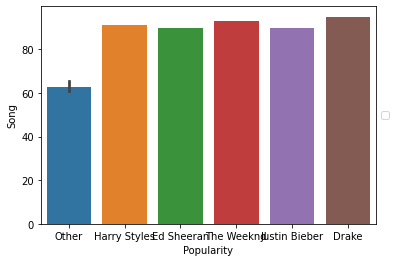

In [10]:
df.loc[~df["artist_name"].isin(top_artists),'artist_name'] = 'Other'

plt.figure()

sns.barplot(data=df[["artist_name", "artist_pop"]], x='artist_name',y='artist_pop')
plt.ylabel('Song')
plt.xlabel('Popularity')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

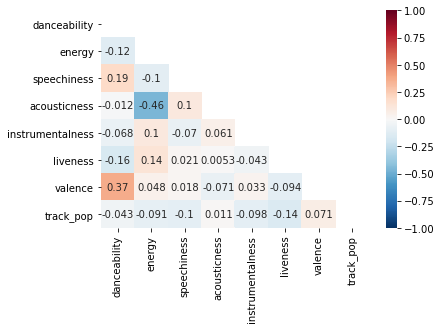

In [11]:
columns_mood = ["danceability", "energy", "speechiness", "acousticness", "instrumentalness", "liveness", "valence","track_pop"]

mask = np.triu(np.ones_like(df[columns_mood].corr(), dtype=bool))

plt.figure()
sns.heatmap(df[columns_mood].corr(), mask=mask, annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r')



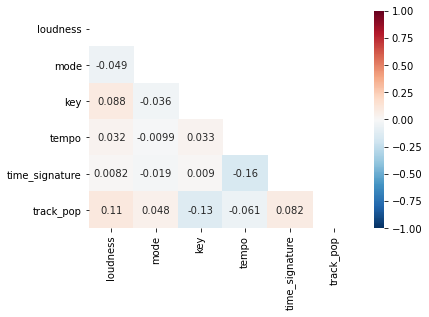

In [12]:
columns_acoustic = ["loudness", "mode", "key", "tempo", "time_signature","track_pop"]

mask = np.triu(np.ones_like(df[columns_acoustic].corr(), dtype=bool))

plt.figure()
sns.heatmap(df[columns_acoustic].corr(), mask=mask, annot = True, vmin= -1.0, vmax= 1.0, center = 0, cmap = 'RdBu_r')

In [13]:
colors = ["#09101F","#72DDF7", '#F7AEF8']

def scatter(df, x, y, ax, main_color=colors[1], second_color=colors[0]):
    
    sns.regplot(data=df, x=x, y=y, ax=ax, 
                 color=main_color, ci=75,
                scatter_kws={
                    'edgecolor':second_color,
                    'linewidth':1.5,
                    's':50
                },
                line_kws={
                    'color':colors[2],
                    'linewidth':3,
                }
               )
    ax.set_xlabel(x.replace("_", " ").capitalize())
    ax.set_ylabel(y.replace("_", " ").capitalize())
    
    sns.despine(ax=ax)
    ax.grid(axis='x')

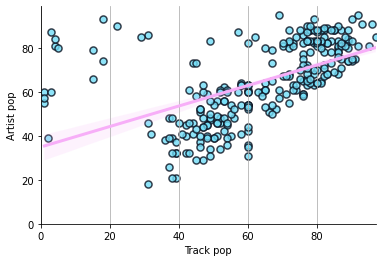

In [14]:
fig, ax = plt.subplots()

scatter(df, 'track_pop', 'artist_pop', ax)

ax.set_ylim(bottom=0)
ax.set_xlim(left=0)

plt.show()

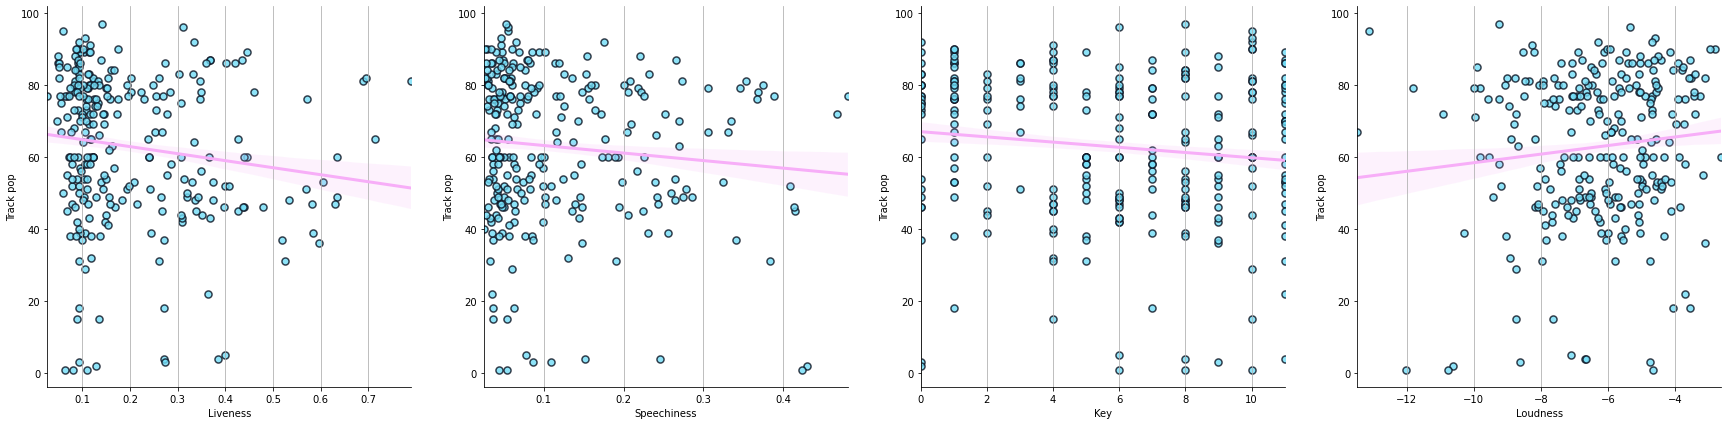

In [15]:
cols = ['liveness', 'speechiness', 'key', 'loudness']

fig, axs = plt.subplots(1, 4, figsize=(30, 7))

for i, col in enumerate(cols):
    
    scatter(df, col, 'track_pop', axs[i])
    

plt.show()